# IMAGE PROCESSING WITH QUANTUM COMPUTING

(https://lab.quantum-computing.ibm.com/user/62d9a5a4be150d440d21d155/lab/workspaces/auto-h/tree/ASP_DrRajKumar.ipynb)

# Quantum Addition
#### Comparing classical vs Quantum

In [17]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [18]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

## 2. Computation as a diagram <a id="diagram"></a>

Whether we use qubits or bits, we need to manipulate them to transform the input into the desired output. For the simplest programs with very few bits, it makes sense to represent this process with a diagram called a schematic. They have inputs on the left, outputs on the right, and operations represented by fuzzy symbols in between. These operations are called "gates", mainly for historical reasons.

This is an example of what a typical bit-based computer circuit might look like.

![image1](images/classical_circuit.png)

For quantum computers, we use the same basic idea, but with different conventions for representing the symbols used for inputs, outputs, and operations. Here is a quantum circuit representing the same process as above.

![image2](images/quantum_circuit.png)

A circuit typically needs to do three things. 
1. First encode the input, 
2. computation
3. extract the output. 

In our first quantum circuit, we will focus on the last of these tasks. First, create a circuit with 8 qubits and 8 outputs.

In [19]:
qc_output = QuantumCircuit(8)

**Qc_output** is created by Qiskit using QuantumCircuit.  
QuantumCircuit takes as an argument the number of qubits in the quantum circuit. 
The Output extraction in quantum circuits is done with an operation called **measure_all()**. 
Each measurement instructs a specific qubit to give an output on a specific output bit.
The qc_output.measure_all() command adds a measurement to each qubit of the qc_output circuit and also some classical bits to write the output.

In [23]:
qc_output.measure_all()

This is our circuit with something added.

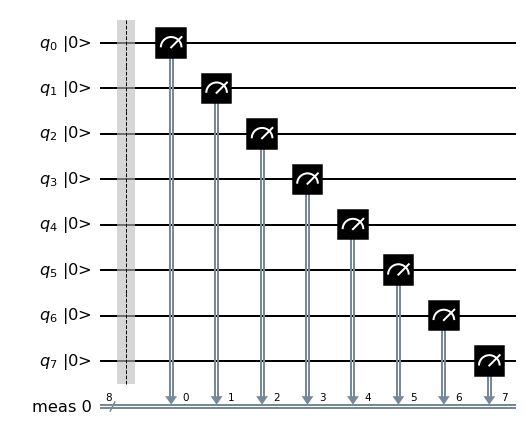

In [21]:
qc_output.draw(initial_state=True)

The qubit is always initialized and the output is 0. Since we didn't do anything with the qubits in the circuit above, this is exactly what we get when we measure them. This can be verified by running the circuit many times and plotting the results in a histogram. Note that the result is always 00000000: 0 from each qubit.

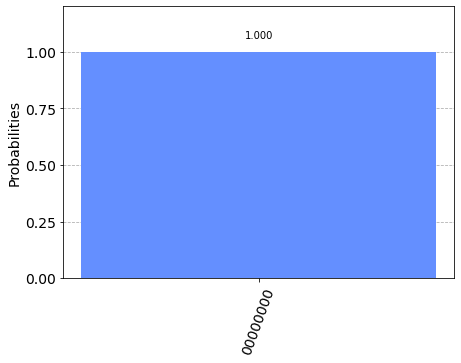

In [22]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

The reason we do this so often and display the results as a histogram is that quantum computers can have randomness in their results. In this case, the quantum is doing nothing, so we're pretty sure we'll only get a result of "00000000".

## Creating an Adder Circuit <a id="adder"></a>
### Encoding an input <a id="encoding"></a>

Now let's see how to encode another binary string as input. This requires a so-called NOT gate. This is the most basic operation a computer can perform. Simply invert the bit values: 0 becomes 1, 1 becomes 0. For qubits, it's an operation called x that acts as NOT.

Below, create a new circuit specifically for encoding and call it qc_encode. For now, we're just specifying the number of qubits.

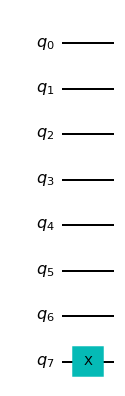

In [7]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

Extraction of the result can be done with the circuit we have before: qc_output.

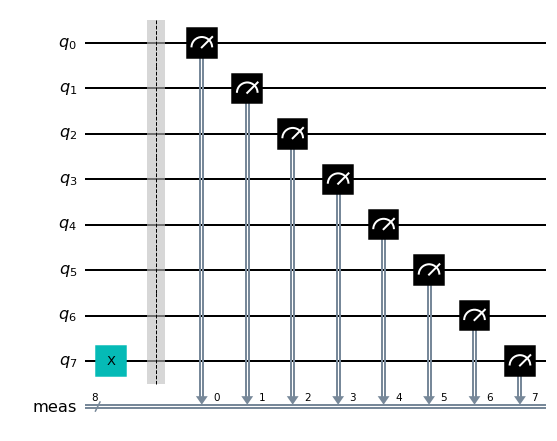

In [8]:
qc_encode.measure_all()
qc_encode.draw()

Now you can run the combined circuit and see the results.

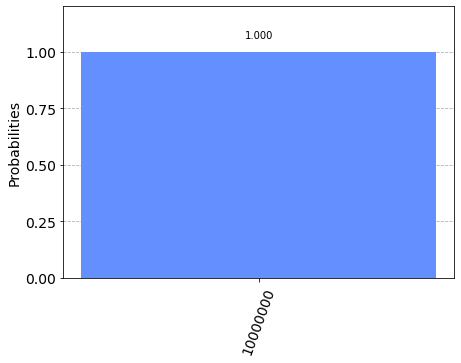

In [9]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Now the computer prints the string 10000000 instead.

The inverted bit from qubit 7 is at the left end of the string. This is because Qiskit numbers the bits in strings from right to left. Some people prefer to number the bits in reverse, but Qiskit's system certainly has its advantages when using bits to represent numbers. Specifically, this means that qubit 7 tells us how many 27

are in our number. Flipping this bit writes the number 128 to a simple 8-bit computer.

Now write another number for yourself. For example you can make your age. Use your search engine to find out what the number looks like in binary format (ignore if it contains '0b') and add a 0 to the left if it's less than 128 .

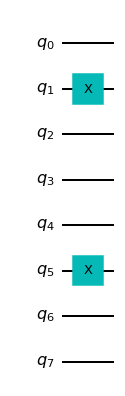

In [10]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

 Take an input that we have encoded, and turn it into an output

### Adding with Qiskit

![half adder implemented on a quantum circuit](images/half-adder.svg)

XOR gate

| Input 1 | Input 2 | XOR Output |
|:-------:|:-------:|:------:|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

In a quantum computer, the work of an XOR gate is done by a controlled NOT gate,CNOT. In Qiskit it's called cx for even shorter. The circuit diagram is drawn as shown below.

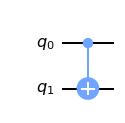

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

This applies to pairs of qubits. One acts as a control qubit (the one with the little dot). The other acts as a target qubit (with a + in the big circle).

There are several ways to explain the effect of CNOT. One thing we can say is that we look at two input bits to see if they are the same or different. Then overwrite the target qubit with the response. 0 if equal, 1 otherwise.
Image

Another way to describe CNOT is that if the control is 1, do NOT to the target, otherwise do nothing. This explanation is just as valid as the previous one (actually, the gates are named).

Try each possible input and try CNOT yourself. For example, here is a circuit that tests CNOT on input 01.

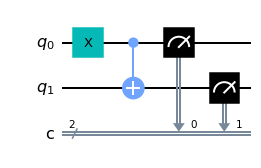

In [12]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

Run this circuit and you will see that the output is 11. This is likely due to one of the following reasons:

CNOT calculates whether the input values are different and determines that they are different. In other words, we want to output 1. 
To do this, he overwrites the state of qubit 1 (you know, it's on the left side of the bitstring), transforming 01 into 11. 
This flips the 0 in qubit 1 to 1 and turns 01 to 11.

| Input (q1 q0) | Output (q1 q0) |
|:-------------:|:--------------:|
| 00            | 00             |
| 01            | 11             |
| 10            | 10             |
| 11            | 01             |

In the half adder we don't want to overwrite the input. Instead, we want to write the result to another qubit pair. Two CNOTs are available for this purpose.

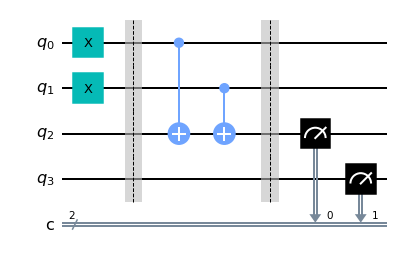

In [13]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

Looking again at the four possible sums, we see that there is only one case where this is 1 out of 0: 1+1=10. Occurs only if both bits to add are 1.

To compute this part of the output, just have the computer check that both inputs are 1. If so, and only if so, we need to create a NOT gate on qubit 3. This inverts it to the value 1 that we want in this case and gives us the output we want.

For this we need a new gate. Like CNOT, but controlled by two qubits instead of one. This will NOT execute on the target qubit only if both controls are in the 1 state. This new gate is called Tofori. For those familiar with Boolean logic gates, this is basically an AND gate.

In Qiskit, Toffoli is rendered with the ccx command.

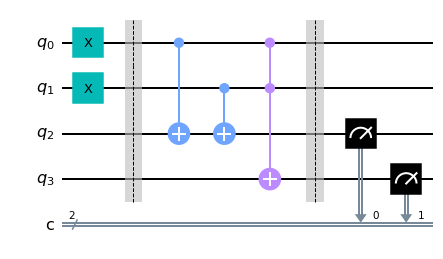

In [14]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

This example computes 1+1 because both input bits are 1. Let's see what we get.

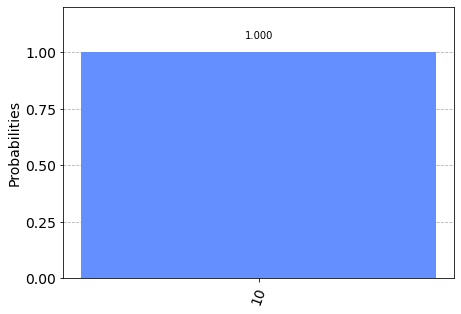

In [15]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

**The result is 10, which is the binary representation of the number 2**. 

Solved 1+1 math problem!

Now try it with three other possible inputs to show that the algorithm also returns correct results for these can do.

Half adder contains everything needed for addition. Using NOT, CNOT, and Toffoli gates, you can write a program to add any number of sets of any size.

These three gates are sufficient for all other operations. In fact, you can do it without CNOT. Also, NOT gates are only needed to generate 1-valued bits. Toffoli gates are essentially atoms of mathematics. This is the simplest element from which other problem-solving techniques can be assembled.

As we will see, quantum computing divides atoms.

# Detecting Image Edges using Quantum Computing

## Quantum Probability Image Encoding (QPIE)

The QPIE representation uses the probability amplitudes of quantum states to store pixel values ​​in conventional images. If we have 𝑛 qubits, we can access at most 2 𝑛 states in the superposition. QPIE takes advantage of this fact to design efficient and robust encoding schemes for black-and-white (B&W) or RGB images, exponentially reducing the memory required to store the data. This means that only two qubits are required to store a 4-pixel image. For an 8-pixel image, you need 3 qubits

$$
n = \lceil \log_2N \rceil
\label{eq:Num_qubits} 
$$
#### Converting Classical Image to QPIE

<img src='./images/classical_repr.png' align='center' width='200px'>

where the vectors are (𝐼0, 𝐼1, 𝐼2, 𝐼3)
(or (𝐼00, 𝐼01, 𝐼01, 𝐼11) in subscript binary representation) and various pixels (00,01,10,11) of color intensity (8-bit B&W color) ) as a 2D matrix to replace traditional 2×2 

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
I = (I_{yx})_{N_1 \times N_2}
\label{eq:Classical_Img} 
$$

An image can be expressed in pixel intensity as follows: is the intensity of the pixel at location (𝑥,𝑦)

in the 2D image, starting the axes from the upper left corner of the image.

Now we need to express these pixel intensities as probability amplitudes for a particular quantum state. To do this, we need to normalize the pixel intensities so that the sum of the squares of all probability amplitudes is 1. For each 𝐼𝑦𝑥 corresponding to each 𝐼𝑦𝑥

Normalization can be done as

$$
c_i = \frac{I_{yx}}{\sqrt{\sum I_{yx} ^2}}
\label{eq:QPIE_normalize}
$$

#### Quantum Image looks like this
<img src='./images/QPIE_repr.png' align='center' width='200px'>

The normalized pixel color value of each pixel 𝑃𝑖 is assigned to each quantum state 

$\ket{\text{Img}}$ as:-

$$
\ket{\text{Img}} = c_0 \ket{00} + c_1 \ket{01} + c_2 \ket{10} + c_3 \ket{11}
\label{eq:QPIE_Img} 
$$

Such a state can be prepared very efficiently just by using some rotation gates and CNOT gates,
$$
\ket{\text{Img}} = \sum _{i=0} ^{2^n-1} c_i \ket{i}
\label{eq:QPIE_Img_sum} \tag{1.5}
$$

<img src='./images/state_prep.png' align='center' width='400px'>

#### Quantum Circuit
Let us take a sample $4 \times 4$ image, flattened and represented as the vector: $(0, 0.9, 0, 0, 0.5, 0.6, 0.3, 0, 0, 0.2, 0.7, 0.8, 0, 0, 1, 0)$,

<img src='./images/sample_image_QHED.png' align='center'>

The QHED quantum circuit for the above image can be generalized as:

<img src='./images/sample_image_circuit.png' align='center' width='500px'>

The measurements of data qubits ($qr1_1$, $qr1_2$, $qr1_3$, and $qr1_4$) is dependent on the measurement outcome of auxiliary qubit ($qr1_0$) being in the state $\ket{1}$

## Implemenation of Quantum Edge Detection

In [34]:
from qiskit import *
from qiskit import IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')


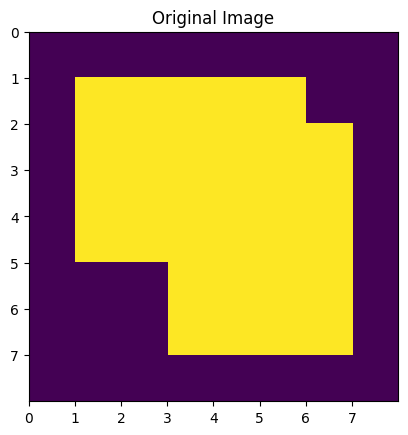

In [45]:
# A 8x8 binary image represented as a numpy array
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0]])

# Function for plotting the image using matplotlib
def plot_image(img, title: str):
    plt.title(title)
    plt.xticks(range(img.shape[0]))
    plt.yticks(range(img.shape[1]))
    plt.imshow(img, extent=[0, img.shape[0], img.shape[1], 0], cmap='viridis')
    plt.show()
    
plot_image(image, 'Original Image')


In [36]:
# Convert the raw pixel values to probability amplitudes
def amplitude_encode(img_data):
    
    # Calculate the RMS value
    rms = np.sqrt(np.sum(np.sum(img_data**2, axis=1)))
    
    # Create normalized image
    image_norm = []
    for arr in img_data:
        for ele in arr:
            image_norm.append(ele / rms)
        
    # Return the normalized image as a numpy array
    return np.array(image_norm)

# Get the amplitude ancoded pixel values
# Horizontal: Original image
image_norm_h = amplitude_encode(image)

# Vertical: Transpose of Original image
image_norm_v = amplitude_encode(image.T)

As you can see in the Python code above, we get two different amplitude-encoded quantum images. The first (`image_norm_h`) is for scanning the image horizontally and the second (`image_norm_v`) is for scanning the image vertically.

We then uniformly initialize the number of qubits and the amplitude permutation.

In [37]:
# Initialize some global variable for number of qubits
data_qb = 6
anc_qb = 1
total_qb = data_qb + anc_qb

# Initialize the amplitude permutation unitary
D2n_1 = np.roll(np.identity(2**total_qb), 1, axis=1)

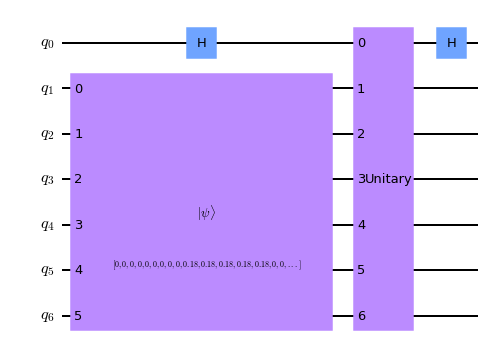

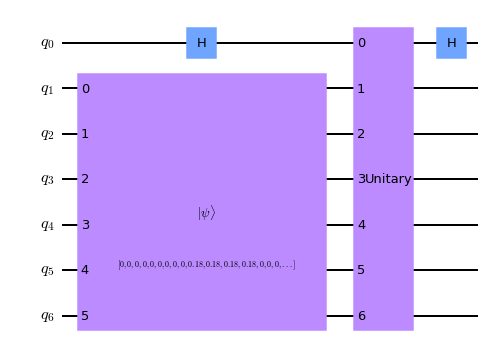

In [38]:
# Create the circuit for horizontal scan
qc_h = QuantumCircuit(total_qb)
qc_h.initialize(image_norm_h, range(1, total_qb))
qc_h.h(0)
qc_h.unitary(D2n_1, range(total_qb))
qc_h.h(0)
display(qc_h.draw('mpl', fold=-1))

# Create the circuit for vertical scan
qc_v = QuantumCircuit(total_qb)
qc_v.initialize(image_norm_v, range(1, total_qb))
qc_v.h(0)
qc_v.unitary(D2n_1, range(total_qb))
qc_v.h(0)
display(qc_v.draw('mpl', fold=-1))

# Combine both circuits into a single list
circ_list = [qc_h, qc_v]

Then simulate the circuit using `statevector_simulator` and get the system state vector as an output.

In [ ]:
# Simulating the cirucits
back = Aer.get_backend('statevector_simulator')
results = execute(circ_list, backend=back).result()
sv_h = results.get_statevector(qc_h)
sv_v = results.get_statevector(qc_v)

from qiskit.visualization import array_to_latex
print('Horizontal scan statevector:')
display(array_to_latex(sv_h[:30], max_size=30))
print()
print('Vertical scan statevector:')
display(array_to_latex(sv_v[:30], max_size=30))


The code below performs this task along with some conventional post-processing for best results when plotting images. After excluding the desired states from the raw state vector, we can rearrange the 1D amplitude array into a 2D matrix to obtain edge-detected horizontal and vertical scans as follows:


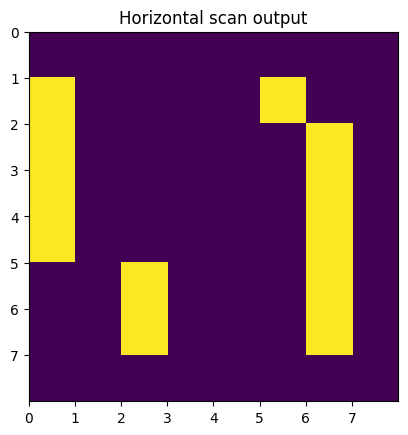

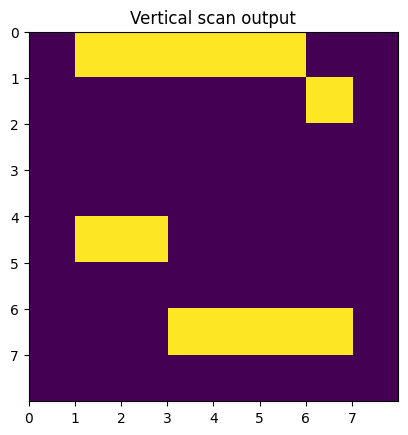

In [44]:
# Classical postprocessing for plotting the output

# Defining a lambda function for
# thresholding to binary values
threshold = lambda amp: (amp > 1e-15 or amp < -1e-15)

# Selecting odd states from the raw statevector and
# reshaping column vector of size 64 to an 8x8 matrix
edge_scan_h = np.abs(np.array([1 if threshold(sv_h[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(8, 8)
edge_scan_v = np.abs(np.array([1 if threshold(sv_v[2*i+1].real) else 0 for i in range(2**data_qb)])).reshape(8, 8).T

# Plotting the Horizontal and vertical scans
plot_image(edge_scan_h, 'Horizontal scan output')
plot_image(edge_scan_v, 'Vertical scan output')

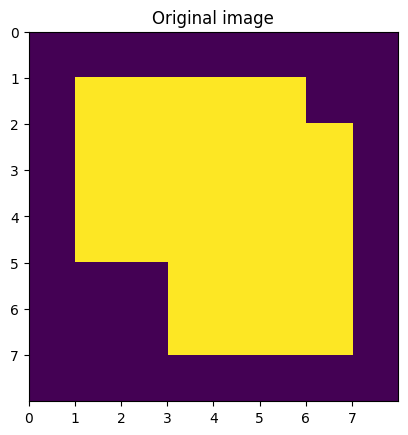

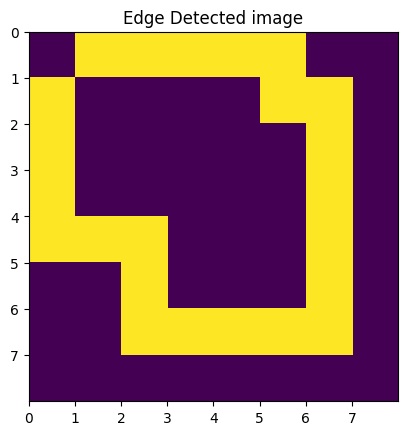

In [46]:


# Combining the horizontal and vertical component of the result
edge_scan_sim = edge_scan_h | edge_scan_v

# Plotting the original and edge-detected images
plot_image(image, 'Original image')
plot_image(edge_scan_sim, 'Edge Detected image')



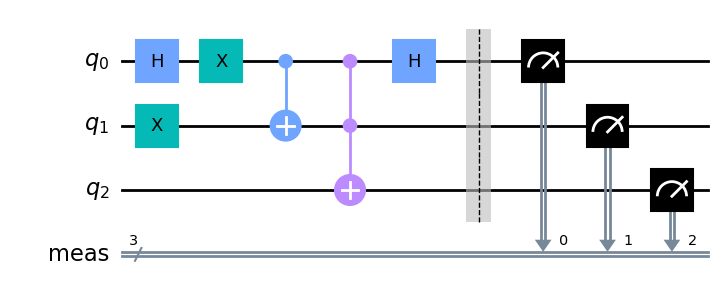

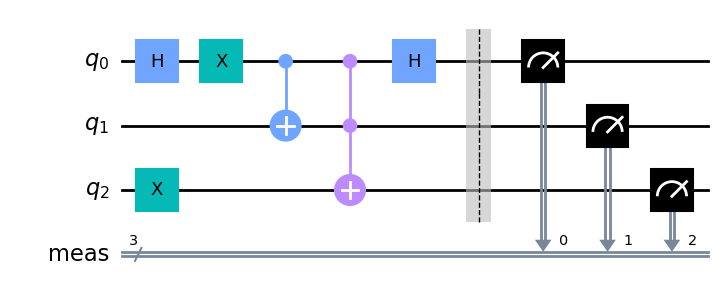

In [47]:
# Initialize the number of qubits
data_qb = 2
anc_qb = 1
total_qb = data_qb + anc_qb

# Create the circuit for horizontal scan
qc_small_h = QuantumCircuit(total_qb)
qc_small_h.x(1)
qc_small_h.h(0)

# Decrement gate - START
qc_small_h.x(0)
qc_small_h.cx(0, 1)
qc_small_h.ccx(0, 1, 2)
# Decrement gate - END

qc_small_h.h(0)
qc_small_h.measure_all()
display(qc_small_h.draw('mpl'))

# Create the circuit for vertical scan
qc_small_v = QuantumCircuit(total_qb)
qc_small_v.x(2)
qc_small_v.h(0)

# Decrement gate - START
qc_small_v.x(0)
qc_small_v.cx(0, 1)
qc_small_v.ccx(0, 1, 2)
# Decrement gate - END

qc_small_v.h(0)
qc_small_v.measure_all()
display(qc_small_v.draw('mpl'))

# Combine both circuits into a single list
circ_list = [qc_small_h, qc_small_v]



Raw Image info: (256, 256, 3)
Raw Image datatype: uint8
Image shape (numpy array): (256, 256)


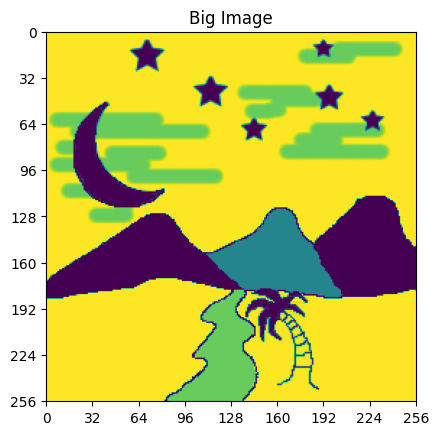

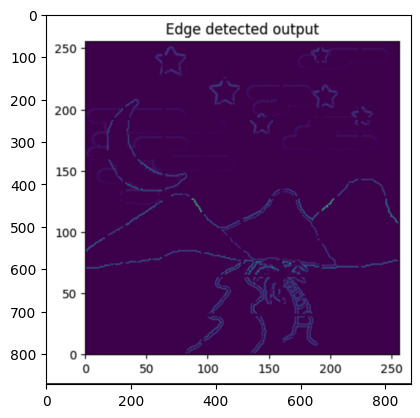

In [64]:
from PIL import Image
style.use('default')

image_size = 256       # Original image-width
image_crop_size = 32   # Width of each part of image for processing


# Load the image from filesystem
image_raw = np.array(Image.open('./images/edge_detection_input.jpg'))
print('Raw Image info:', image_raw.shape)
print('Raw Image datatype:', image_raw.dtype)


# Convert the RBG component of the image to B&W image, as a numpy (uint8) array
image = []
for i in range(image_size):
    image.append([])
    for j in range(image_size):
        image[i].append(image_raw[i][j][0] / 255)
            
image = np.array(image)
print('Image shape (numpy array):', image.shape)


# Display the image
plt.title('Big Image')
plt.xticks(range(0, image.shape[0]+1, 32))
plt.yticks(range(0, image.shape[1]+1, 32))
plt.imshow(image, extent=[0, image.shape[0], image.shape[1], 0], cmap='viridis')
plt.show()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./images/edge_detection_sample_output.png')
imgplot = plt.imshow(img)
plt.show()

# References 

[1] Le, P.Q., Dong, F. & Hirota, K. A flexible representation of quantum images for polynomial preparation, image compression, and processing operations. Quantum Inf Process 10, 63–84 (2011). https://doi.org/10.1007/s11128-010-0177-y 

[2] Zhang, Y., Lu, K., Gao, Y. et al. _NEQR: a novel enhanced quantum representation of digital images._ Quantum Inf Process 12, 2833–2860 (2013). https://doi.org/10.1007/s11128-013-0567-z

[3] Yao, Xi-Wei, et al. "Quantum image processing and its application to edge detection: theory and experiment." Physical Review X 7.3 (2017): 031041. https://arxiv.org/abs/1801.01465

[4] Zhang, Yi, Kai Lu, and YingHui Gao. "QSobel: a novel quantum image edge extraction algorithm." Science China Information Sciences 58.1 (2015): 1-13. https://link.springer.com/article/10.1007/s11432-014-5158-9

[5] Yan, Fei, Abdullah M. Iliyasu, and Salvador E. Venegas-Andraca. "A survey of quantum image representations." Quantum Information Processing 15.1 (2016): 1-35. https://link.springer.com/article/10.1007/s11128-015-1195-6

[6] Ruan, Yue, Xiling Xue, and Yuanxia Shen. "Quantum Image Processing: Opportunities and Challenges." Mathematical Problems in Engineering 2021 (2021). https://www.hindawi.com/journals/mpe/2021/6671613/

[7] L. Grover and T. Rudolph, "Creating Superpositions That Correspond to Efficiently Integrable Probability Distributions", https://arxiv.org/abs/quant-ph/0208112

[8] A. N. Soklakov and R. Schack, "Efficient State Preparation for a Register of Quantum Bits", Phys. Rev. A 73, 012307 (2006). https://arxiv.org/abs/quant-ph/0408045

[9] Fijany, Amir, and Colin P. Williams. "Quantum wavelet transforms: Fast algorithms and complete circuits." NASA international conference on quantum computing and quantum communications. Springer, Berlin, Heidelberg, 1998. https://arxiv.org/abs/quant-ph/9809004

[10] Craig Gidney, "Constructing Large Increment Gates". https://algassert.com/circuits/2015/06/12/Constructing-Large-Increment-Gates.html

[11] Katiyar, Sunil Kumar, and P. V. Arun. "Comparative analysis of common edge detection techniques in context of object extraction." arXiv preprint arXiv:1405.6132 (2014). https://arxiv.org/abs/1405.6132

[12] Zhang, Xiao-Ming, Man-Hong Yung, and Xiao Yuan. "Low-depth Quantum State Preparation." arXiv preprint arXiv:2102.07533 (2021). https://arxiv.org/abs/2102.07533